In [2]:
from keras.applications import vgg16
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [3]:

imgs_path = "C:/Users/FeelTech-06/Desktop/Final Images/"
imgs_model_width, imgs_model_height = 224, 224

nb_closest_images = 5 # number of most similar images to retrieve

In [4]:
vgg_model = vgg16.VGG16(weights='imagenet')

# remove the last layers in order to get features instead of predictions
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

# print the layers of the CNN
feat_extractor.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [5]:
files = [imgs_path + x for x in os.listdir(imgs_path) if "jpg" in x]

print("number of images:",len(files))

number of images: 978


image loaded successfully!


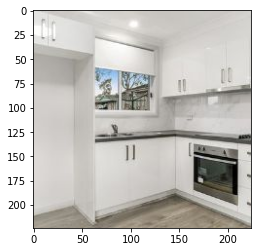

In [6]:
original = load_img(files[1], target_size=(imgs_model_width, imgs_model_height))
plt.imshow(original)
print("image loaded successfully!")

In [7]:
# in PIL - image is in (width, height, channel)
# in Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)

# convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# we want the input matrix to the network to be of the form (batchsize, height, width, channels)
# thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)

# prepare the image for the VGG model
processed_image = preprocess_input(image_batch.copy())

image batch size (1, 224, 224, 3)


In [8]:
# get the extracted features
img_features = feat_extractor.predict(processed_image)

print("features successfully extracted!")
print("number of image features:",img_features.size)
img_features

features successfully extracted!
number of image features: 4096


array([[2.4285407 , 4.975625  , 1.8179142 , ..., 0.        , 0.        ,
        0.90896976]], dtype=float32)

In [9]:
# load all the images and prepare them for feeding into the CNN

importedImages = []

for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    
    importedImages.append(image_batch)
    
images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())

In [10]:
# extract the images features

imgs_features = feat_extractor.predict(processed_imgs)

print("features successfully extracted!")
imgs_features.shape

features successfully extracted!


(978, 4096)

In [11]:
# compute cosine similarities between images

cosSimilarities = cosine_similarity(imgs_features)

# store the results into a pandas dataframe

cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)


In [12]:
cos_similarities_df.to_csv('cosine.csv')

In [13]:

def retrieve_most_similar_products(given_img):

    print("-----------------------------------------------------------------------")
    print("original product:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("most similar products:")
    
    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("similarity score : ",closest_imgs_scores[i])


In [14]:
files

['C:/Users/FeelTech-06/Desktop/Final Images/A (1).jpg',
 'C:/Users/FeelTech-06/Desktop/Final Images/A (100).jpg',
 'C:/Users/FeelTech-06/Desktop/Final Images/A (101).jpg',
 'C:/Users/FeelTech-06/Desktop/Final Images/A (102).jpg',
 'C:/Users/FeelTech-06/Desktop/Final Images/A (104).jpg',
 'C:/Users/FeelTech-06/Desktop/Final Images/A (105).jpg',
 'C:/Users/FeelTech-06/Desktop/Final Images/A (106).jpg',
 'C:/Users/FeelTech-06/Desktop/Final Images/A (107).jpg',
 'C:/Users/FeelTech-06/Desktop/Final Images/A (11).jpg',
 'C:/Users/FeelTech-06/Desktop/Final Images/A (110).jpg',
 'C:/Users/FeelTech-06/Desktop/Final Images/A (112).jpg',
 'C:/Users/FeelTech-06/Desktop/Final Images/A (113).jpg',
 'C:/Users/FeelTech-06/Desktop/Final Images/A (114).jpg',
 'C:/Users/FeelTech-06/Desktop/Final Images/A (115).jpg',
 'C:/Users/FeelTech-06/Desktop/Final Images/A (117).jpg',
 'C:/Users/FeelTech-06/Desktop/Final Images/A (118).jpg',
 'C:/Users/FeelTech-06/Desktop/Final Images/A (12).jpg',
 'C:/Users/FeelTec

-----------------------------------------------------------------------
original product:


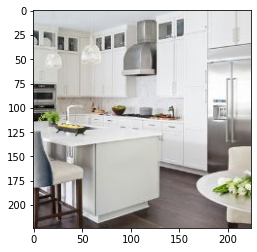

-----------------------------------------------------------------------
most similar products:


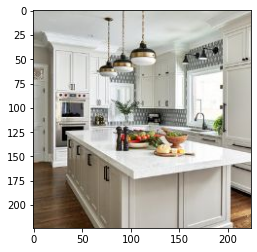

similarity score :  0.7896731


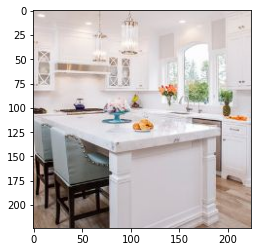

similarity score :  0.7808643


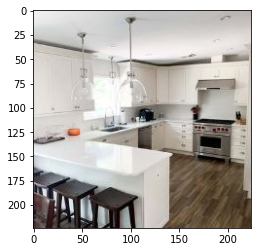

similarity score :  0.7701778


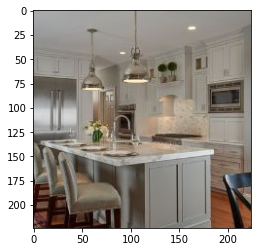

similarity score :  0.76737005


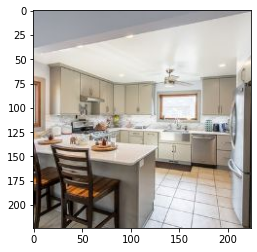

similarity score :  0.7669167


In [25]:
#retrieve_most_similar_products(files[138])
retrieve_most_similar_products('C:/Users/FeelTech-06/Desktop/Final Images/B (138).jpg')